In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('Weights/Ques1/pm2.5.csv')

In [70]:
df.shape

(43824, 13)

In [71]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [72]:
df.drop(["No"], axis=1, inplace=True)

In [73]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [74]:
df.shape

(43824, 12)

In [75]:
df['pm2.5'].isna().sum()

2067

In [76]:
df.dropna(inplace=True)

In [77]:
df.shape

(41757, 12)

In [78]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [79]:
df['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [80]:
def encodeCBWD(val):
    if val == 'SE':
        return 1
    elif val == 'NW':
        return 2
    elif val == 'NE':
        return 3
    return 4

In [81]:
df['cbwd'] = df['cbwd'].apply(encodeCBWD)

In [82]:
df.shape

(41757, 12)

In [83]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,1,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,1,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,1,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,1,6.25,2,0


In [96]:
def train_test_split(df, trainSize = 0.8, testSize = 0.2, random_state = 42):
    validSize = 1 - trainSize - testSize
    indices = np.arange(df.shape[0])
    np.random.seed(random_state)
    np.random.shuffle(indices)
    trainData = df.iloc[indices[:int(trainSize*df.shape[0])]].reset_index(drop=True)
    validData = df.iloc[indices[int(trainSize*df.shape[0]):int((trainSize+validSize)*df.shape[0])]].reset_index(drop=True)
    testData = df.iloc[indices[int((trainSize+validSize)*df.shape[0]):]].reset_index(drop=True)
    if validSize == 0:
        return trainData, testData
    else:
        return trainData, validData, testData
trainData, validData, testData = train_test_split(df, trainSize = 0.70, testSize = 0.15, random_state = 0)

In [97]:
trainData.shape, validData.shape, testData.shape

((29229, 12), (6264, 12), (6264, 12))

In [98]:
trainY = trainData['month']
trainX = trainData.drop(['month'], axis=1)
validY = validData['month']
validX = validData.drop(['month'], axis=1)
testY = testData['month']
testX = testData.drop(['month'], axis=1)

In [99]:
testX.shape, trainX.shape, validX.shape, testY.shape, trainY.shape, validY.shape

((6264, 11), (29229, 11), (6264, 11), (6264,), (29229,), (6264,))

# part a

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy')
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8370051085568327
test 0.8293422733077905


In [102]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='gini')
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8033205619412516
test 0.804757343550447


# part b

In [103]:
depths = [2, 4, 8, 10, 15, 30]

In [104]:
testingAcc = []
trainingAcc = []
validationAcc = []

In [105]:
for depth in depths:
    decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decisionTreeEntropy.fit(trainX, trainY)
    trainingAcc.append(decisionTreeEntropy.score(trainX, trainY))
    validationAcc.append(decisionTreeEntropy.score(validX, validY))
    testingAcc.append(decisionTreeEntropy.score(testX, testY))

In [106]:
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')


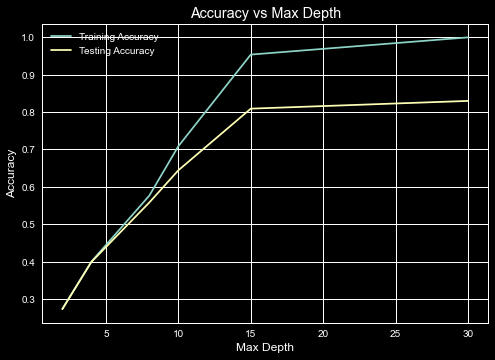

In [107]:
plt.plot(depths, trainingAcc, label='Training Accuracy')
# plt.plot(depths, validationAcc, label='Validation Accuracy')
plt.plot(depths, testingAcc, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

# part c

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)

In [114]:
rfc.fit(trainX, trainY)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [115]:
rfc.score(trainX, trainY), rfc.score(validX, validY), rfc.score(testX, testY)

(0.4377843922132129, 0.4339080459770115, 0.43039591315453385)

In [ ]:
for i in range(100):
    decisionTreeEntropy = DecisionTreeClassifier(
        criterion='entropy', max_depth=3)
    
    decisionTreeEntropy.fit(trainX, trainY)
    trainingAcc.append(decisionTreeEntropy.score(trainX, trainY))
    validationAcc.append(decisionTreeEntropy.score(validX, validY))
    testingAcc.append(decisionTreeEntropy.score(testX, testY))